==========================================================================================================================
<h2> KPI's in Pandas </h2>
<h3> Gabriela Endrös </h3>
<h4> MCSBT: Capstone Project </h4>

==========================================================================================================================

# Loading the Libraries

In [1]:
import pandas as pd
import datetime

# Loading the Data

In [22]:

transactions = pd.read_csv('transactions_sample.csv')

In [23]:
customers = pd.read_csv('customers.csv')

In [24]:
articles = pd.read_csv('articles.csv')

# KPI's: Transactions

In [ ]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
599995,2018-10-01,20f5df40b093d274e9966cae53b97d4010ab75dbe75323...,698637001,0.072017,1
599996,2018-10-01,20f5df40b093d274e9966cae53b97d4010ab75dbe75323...,656497004,0.028797,1
599997,2018-10-01,211d3ef96fbfdbdc3d329a648e42b208632b69d69c5472...,672890001,0.025407,2
599998,2018-10-01,211d3ef96fbfdbdc3d329a648e42b208632b69d69c5472...,633135004,0.033881,2


In [ ]:
# By aggregating the price of all sells we can get the total revenue:
tot_revenue = sum(transactions['price'])
print('Total Revenue On Sales: ' + str(tot_revenue))

Total Revenue On Sales: 17921.728745720997


In [ ]:
# Total sales from transactions / Total count of transactions
avg_transaction_value = tot_revenue / len(transactions['price'])
print('Average Transaction Value: ' + str(avg_transaction_value))

Average Transaction Value: 0.029869547909534996


In [ ]:
# Sales percentage that took place online vs on the physical store
tot_sales_channel_1 = len(transactions[transactions['sales_channel_id'] == 1])
tot_sales_channel_2 = len(transactions[transactions['sales_channel_id'] == 2])

prc_channel_1 = (tot_sales_channel_1 / len(transactions['sales_channel_id'])) * 100
prc_channel_2 = (tot_sales_channel_2 / len(transactions['sales_channel_id'])) * 100

print('Percentage Channel 1: ' + str(prc_channel_1) + '%')
print('Percentage Channel 2: ' + str(prc_channel_2) + '%')

Percentage Channel 1: 34.736333333333334%
Percentage Channel 2: 65.26366666666667%


In [ ]:
# Variations in the number of sales overtime
sales_date_var = transactions.groupby('t_dat').count()
sales_date_var = sales_date_var[['price']]
sales_date_var.rename(columns={'price': 'sales'}, inplace=True)
sales_date_var['revenue'] = transactions.groupby('t_dat').sum().price
sales_date_var

,sales,revenue
t_dat,,
2018-09-20,48399,1415.345847
2018-09-21,47543,1419.262305
2018-09-22,17635,530.437627
2018-09-23,52230,1593.783085
2018-09-24,45984,1407.609610
2018-09-25,43857,1322.879814
2018-09-26,48224,1434.204458
2018-09-27,44261,1355.498288
2018-09-28,66900,2040.207068


<AxesSubplot:title={'center':'Sales Overtime'}, xlabel='t_dat'>

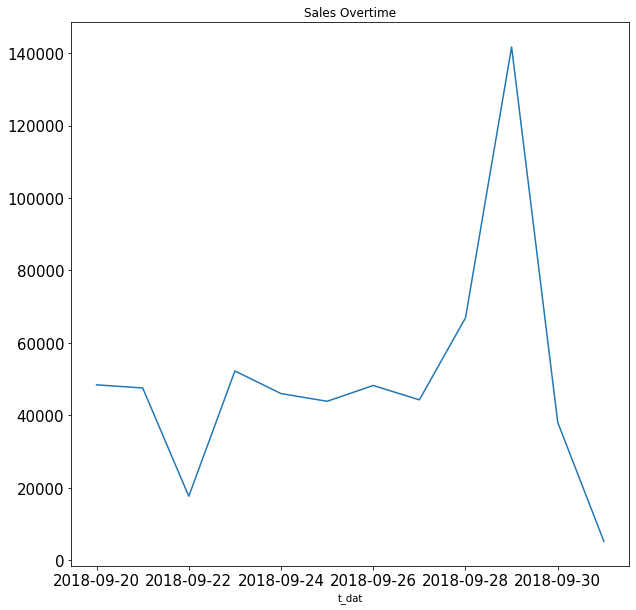

In [ ]:
sales_date_var['sales'].plot(title = "Sales Overtime",
                                              figsize = (10,10),
                                              fontsize = 15)

<AxesSubplot:title={'center':'Revenue Overtime'}, xlabel='t_dat'>

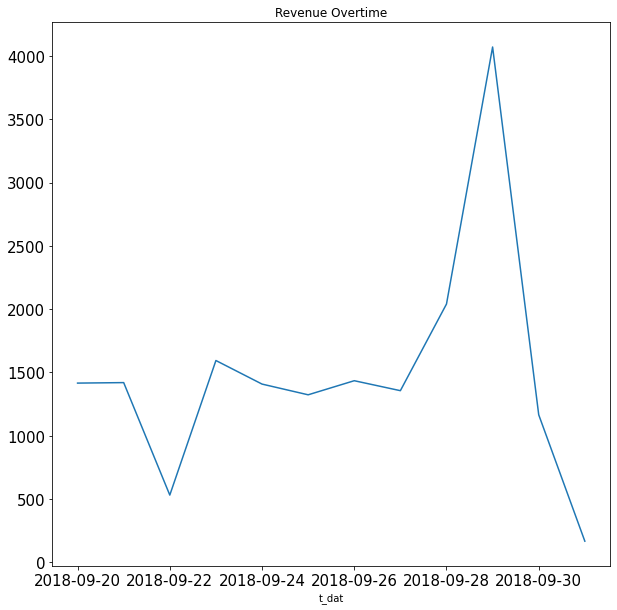

In [ ]:
sales_date_var['revenue'].plot(title = "Revenue Overtime",
                                              figsize = (10,10),
                                              fontsize = 15)

# KPI's: Customers

In [31]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [32]:
# Total count of distinct customers
tot_customer_count = len(customers['customer_id'])
print('Total Customer Count: ' + str(tot_customer_count))

Total Customer Count: 1371980


In [33]:
# Average customer age
avg_customer_age = customers['age'].mean()
print('Average Customer Age: ' + str(avg_customer_age))

Average Customer Age: 36.386964565794


In [34]:
# Percentages of the distribution of club member status (active, pre-create, left club)
club_member_stat = customers.groupby('club_member_status').count()
club_member_stat = club_member_stat[['customer_id']]
club_member_stat.rename(columns={'customer_id': 'count'}, inplace=True)
club_member_stat['percentage'] = (club_member_stat['count'] / tot_customer_count) * 100
club_member_stat

,count,percentage
club_member_status,,
ACTIVE,1272491,92.748509
LEFT CLUB,467,0.034038
PRE-CREATE,92960,6.775609


<AxesSubplot:title={'center':'Club Member Status Percentages'}, ylabel='percentage'>

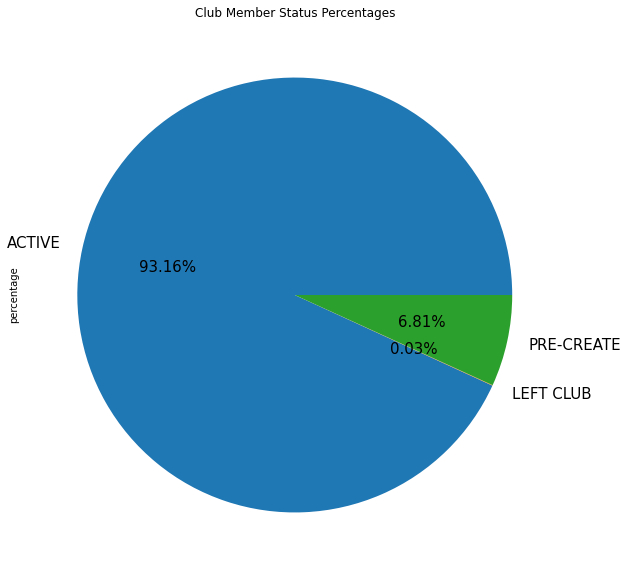

In [35]:
club_member_stat["percentage"].plot.pie(autopct = '%1.2f%%',
                                              title = "Club Member Status Percentages",
                                              figsize = (10,10),
                                              fontsize = 15)

In [36]:
fashion_news = customers.groupby('fashion_news_frequency').mean()
fashion_news = fashion_news[['age']]
fashion_news.rename(columns={'age': 'average_customer_age'}, inplace=True)
fashion_news['total_count'] = customers.groupby('fashion_news_frequency').count().age
fashion_news['percentage'] = (fashion_news['total_count'] / total_customer_count) * 100
fashion_news

,average_customer_age,total_count,percentage
fashion_news_frequency,,,
Monthly,39.686088,841,0.061298
NONE,36.006061,865270,63.067246
None,51.000000,2,0.000146
Regularly,37.030680,476211,34.709763


<AxesSubplot:title={'center':'Fashion News Frequency Percentages'}, ylabel='percentage'>

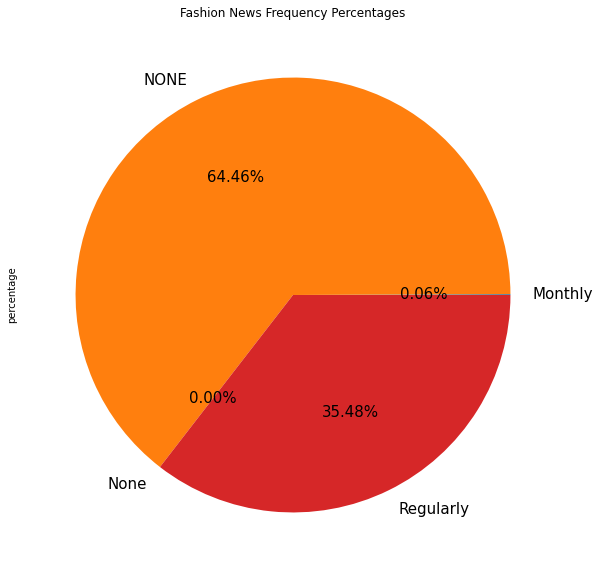

In [37]:
fashion_news["percentage"].plot.pie(autopct = '%1.2f%%',
                                              title = "Fashion News Frequency Percentages",
                                              figsize = (10,10),
                                              fontsize = 15)

# KPI's: Articles

In [25]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [26]:
tot_article_count = len(articles['article_id'])
print('Total Article Count: ' + str(tot_article_count))

Total Article Count: 105542


In [27]:
product_code_count = len(articles.groupby('product_code').count().article_id)
print('Total count of distinct product codes: ' + str(product_code_count))

Total count of distinct product codes: 47224


In [28]:
# Color use percentages of products
colors = articles.groupby('colour_group_name').count()
colors = colors[['colour_group_code']]
colors.rename(columns={'colour_group_code': 'count'}, inplace=True)
colors['percentage'] = (colors['count'] / tot_article_count) * 100
colors

,count,percentage
colour_group_name,,
Beige,2712,2.569593
Black,22670,21.479601
Blue,3308,3.134297
Bronze/Copper,94,0.089064
Dark Beige,1084,1.027079
Dark Blue,12171,11.531902
Dark Green,2106,1.995414
Dark Grey,2731,2.587595
Dark Orange,886,0.839476


In [29]:
women = articles[articles.section_name.str.contains("Women")]
women_prod = women.groupby('section_name').count()
women_prod = women_prod[['article_id']]
women_prod.rename(columns={'article_id': 'count'}, inplace=True)
women_prod

,count
section_name,
Womens Big accessories,1665
Womens Casual,2725
Womens Everyday Basics,1581
Womens Everyday Collection,7295
Womens Jackets,829
Womens Lingerie,3598
"Womens Nightwear, Socks & Tigh",1566
Womens Premium,1270
Womens Shoes,2026


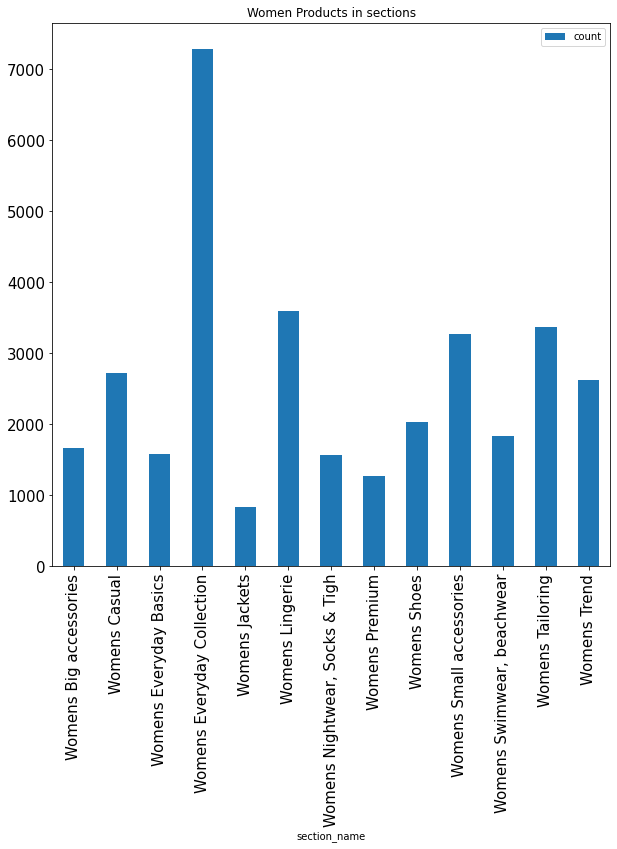

In [30]:
ax = women_prod.plot.bar(title = "Women Products in sections",
                                              figsize = (10,10),
                                              fontsize = 15)

In [56]:
men = articles[articles.section_name.str.contains("Men")]
men_prod = men.groupby('section_name').count()
men_prod = men_prod[['article_id']]
men_prod.rename(columns={'article_id': 'count'}, inplace=True)
men_prod

,count
section_name,
Denim Men,521
Men Accessories,1337
Men Edition,330
Men H&M Sport,872
Men Other,25
Men Other 2,190
Men Project,298
Men Shoes,645
Men Suits & Tailoring,1428


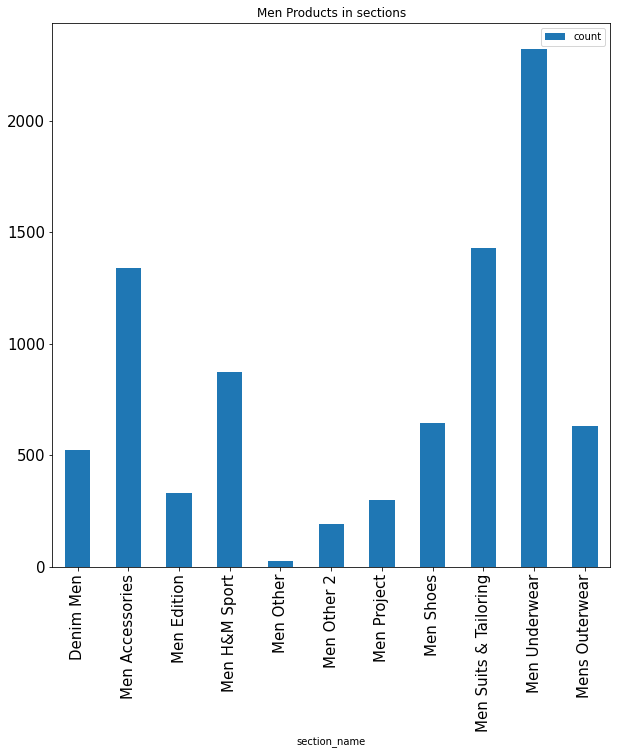

In [57]:
ax = men_prod.plot.bar(title = "Men Products in sections",
                                              figsize = (10,10),
                                              fontsize = 15)